In [36]:
import numpy as np
import scipy as sp
import os 
import sys
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
util_path = 'C:/ASM/Dropbox/Developments/Jupyter/Eating/myutils' if 'C:' in os.getcwd() else './myutils'
sys.path.append(util_path)
import my_file_utils as mfileu

In [38]:
lab_free= 'lab'
assert lab_free in ['lab', 'free']
ds = mfileu.read_file('data', '{}_data_steven_right_smoothed.pkl'.format(lab_free))
ssil = mfileu.read_file('peaks', '{}_ssil_steven_right.pkl'.format(lab_free))

if lab_free=='lab':
    annots = mfileu.read_file('data', '{}_annots_steven_right.pkl'.format(lab_free))
else:
    annots = mfileu.read_file('data', '{}_annots_steven_processed.pkl'.format(lab_free))

[[812.5         -6.31787372]
 [812.5625      -6.28836281]
 [812.625       -6.16170371]
 ...
 [874.8125      -3.07242511]
 [874.875       -2.96375652]
 [874.9375      -2.85511428]]
[[ 8966  8966     1     1     0]
 [11482 11482     1     1     0]
 [11965 11965     1     1     0]
 [12539 12581     2     1     0]
 [13051 13051     1     1     0]
 [13076 13076     1     1     0]
 [13096 13096     1     1     0]
 [13140 13140     1     3     0]
 [13229 13229     1     1     0]
 [13535 13535     1     3     0]
 [13625 13625     1     1     0]
 [13862 13862     1     3     0]
 [13912 13912     1     1     0]
 [14347 14375     2     1     0]
 [15227 15227     1     1     0]
 [15324 15324     1     1     0]
 [15500 15500     1     1     0]
 [15778 15778     1     1     0]
 [16066 16066     1     1     0]
 [16269 16269     1     3     0]]
[13051 13076 13096 13140 13229 13535 13625 13862 13912]
[815.6875 817.25   818.5    821.25   826.8125 845.9375 851.5625 866.375
 869.5   ]
(1137, 2)


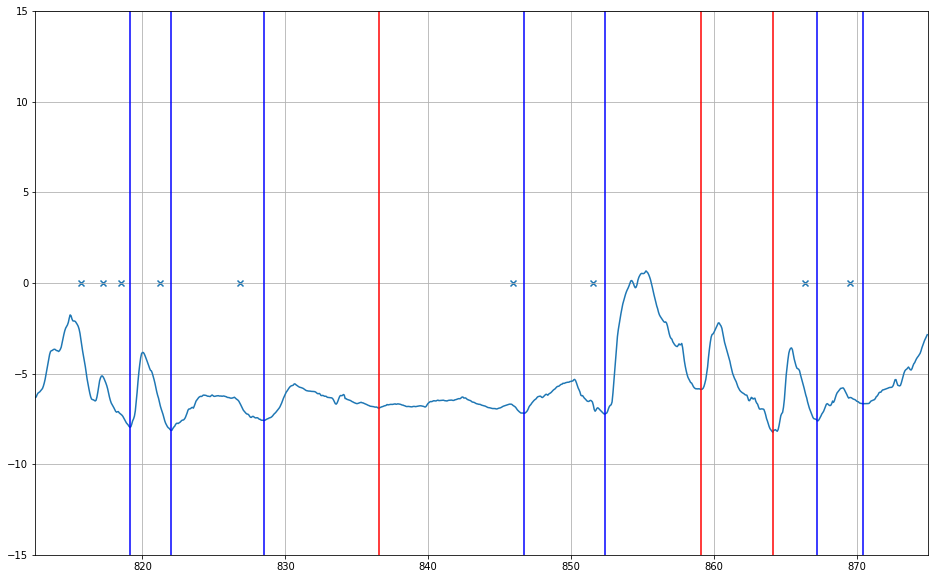

In [39]:
subj, sess = 0, 0
a = annots[subj][sess]

si, ei = 13000, 14000
#si, ei = 832*16, 835*16
d = ds[subj][sess][si:ei, :2]
print(d)


if lab_free=='lab':
    print(a[:20, :])
    cond = (a[:, 2]==1) & (a[:,0]>=si) & (a[:,0]<=ei)
    a = a[cond, 0]
    print(a)
    print(a/16)
else:
    print(a)

cond = (ssil[:,0]==subj) & (ssil[:,1]==sess)
il = ssil[cond, 2:]
print(il.shape)
cond = (il[:,0]>=si) & (il[:,0]<=ei)
il = il[cond, :]



fig = plt.figure(figsize=(16, 10))
ax = plt.subplot(111)  

ax.plot(d[:,0], d[:,1])
for i in range(len(il)):
    c = ['r', 'b', 'g', 'k']
    c = c[il[i,1]]
    plt.axvline(x=il[i, 0]/16, color=c, linestyle='-')
    
if lab_free=='lab':
    ax.scatter(a/16, np.zeros((len(a), )), marker='x')
else:
    for i in range(len(a)):
        ax.plot([a[i,0], a[i,1]], [0, 0], linewidth=5)


plt.xlim([si/16, ei/16])
plt.ylim([-15, 15])
plt.grid(True)
plt.show()  
